              age                        tenure                      \
             mean    median       std      mean    median       std   
cluster                                                               
0       -0.414224 -0.466002  0.353711 -0.348155 -0.348155  0.449467   
1        0.621336  0.621336  0.366126  0.696311  0.696311  0.246183   
2       -1.294451 -1.294451  0.292901 -1.392621 -1.392621  0.246183   
3        1.501563  1.501563  0.292901  1.392621  1.392621  0.246183   

        monthly_spending                      
                    mean    median       std  
cluster                                       
0              -0.357145 -0.398673  0.387269  
1               0.791809  0.791809  0.195767  
2              -1.423042 -1.423042  0.195767  
3               1.345522  1.345522  0.195767  


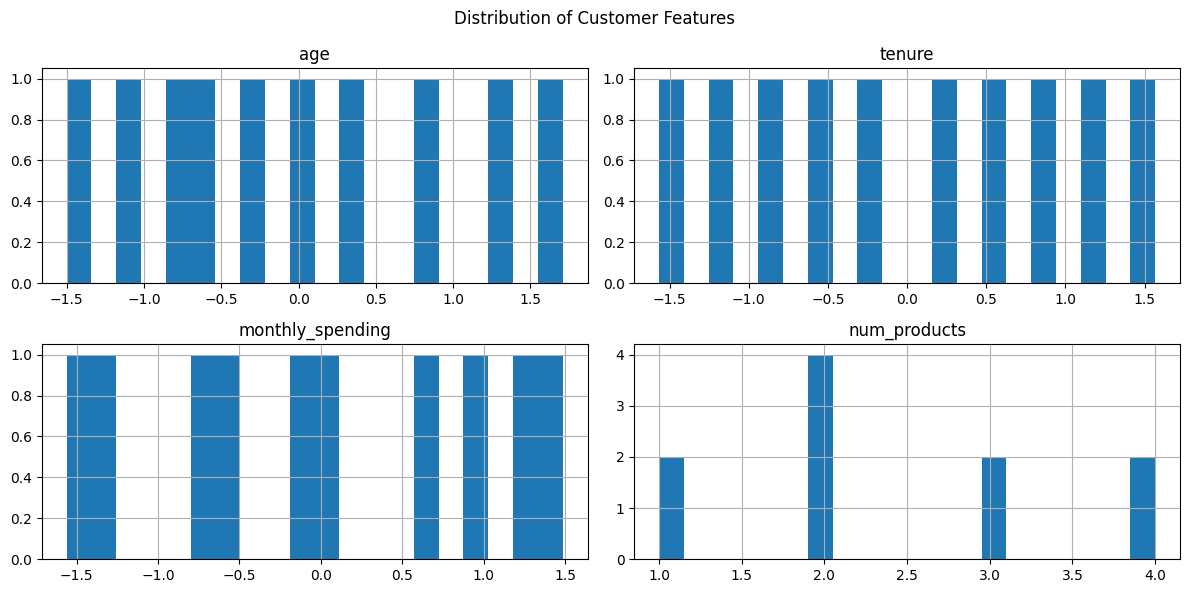

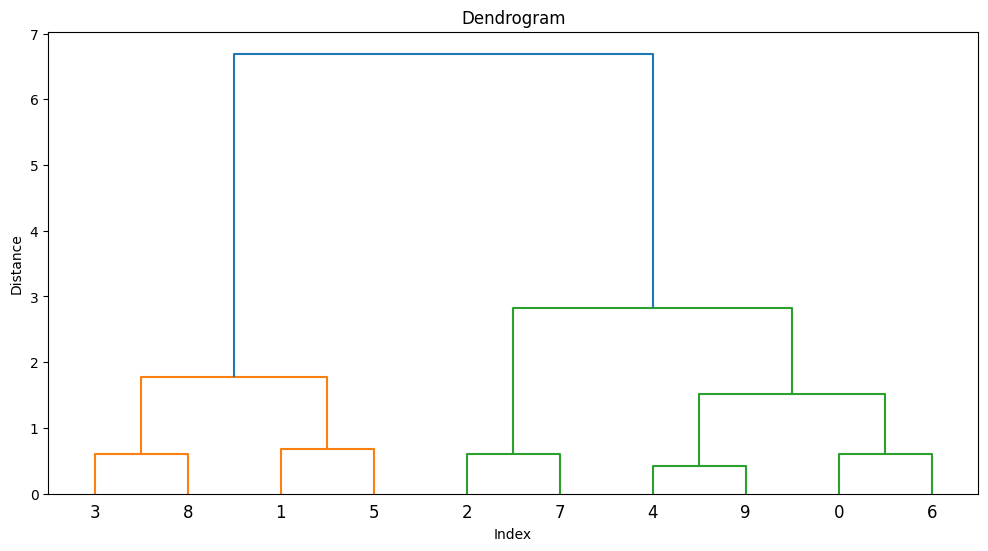

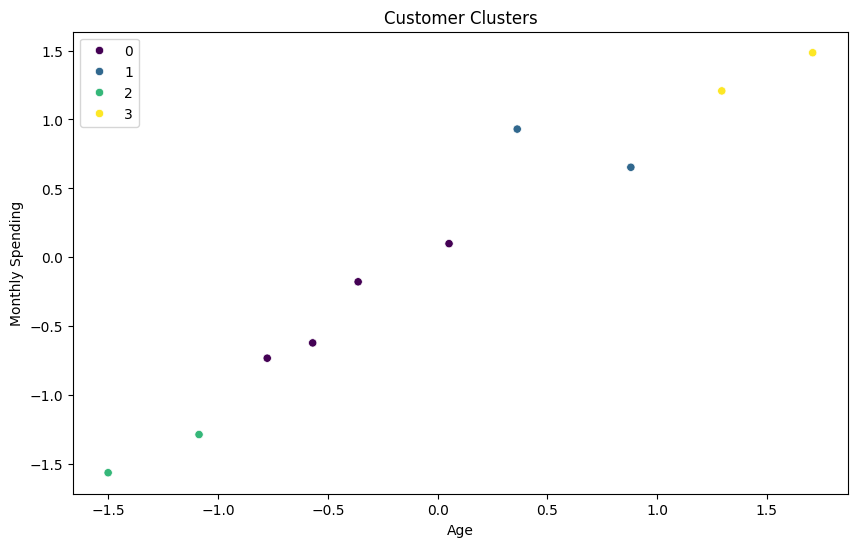

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Data Aggregation

# Load a sample customer dataset
data = pd.DataFrame({
    'age': [35, 42, 28, 55, 31, 47, 39, 24, 51, 33],
    'tenure': [5, 8, 2, 10, 3, 7, 6, 1, 9, 4],
    'monthly_spending': [500, 700, 300, 800, 400, 650, 550, 250, 750, 420],
    'num_products': [2, 3, 1, 4, 2, 3, 2, 1, 4, 2]
})

# Handle missing values
data = data.fillna(data.mean())

# Normalize numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['age', 'tenure', 'monthly_spending']] = scaler.fit_transform(data[['age', 'tenure', 'monthly_spending']])

# Visualize feature distributions
data.hist(bins=20, figsize=(12, 6))
plt.suptitle('Distribution of Customer Features')
plt.tight_layout()

# 2. Hierarchical Clustering

# Select features for clustering
features = ['age', 'tenure', 'monthly_spending']

# Calculate linkage for dendrogram
linkage_matrix = linkage(data[features], method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')

# Choose the number of clusters
n_clusters = 4
agglomerative = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = agglomerative.fit_predict(data[features])
data['cluster'] = labels

# 4. Cluster Profiling

# Compare cluster characteristics
cluster_stats = data.groupby('cluster')[features].agg(['mean', 'median', 'std'])
print(cluster_stats)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='monthly_spending', hue='cluster', data=data, palette='viridis')
plt.title('Customer Clusters')
plt.xlabel('Age')
plt.ylabel('Monthly Spending')
plt.legend()
plt.show()
